# Pandas Assignment

# 1. Cleaning US census Data

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as pyplot

## Compile the Data

***
Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [2]:
census_files = glob.glob("states*.csv")

file_list = []
for filename in census_files:
    data = pd.read_csv(filename)
    file_list.append(data)

census_files

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

## Inital view of the Data

In [3]:
us_census = pd.concat(file_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [4]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [5]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Start to make a plan for how to convert these columns into the right types for manipulation.  

Regex to the Rescue  

Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

## Remove the currency sign and change Data type to numeric

In [6]:
us_census.Income = us_census.Income.replace('[\$]', '', regex=True)
us_census.Income.head()

0    43296.35860306644
1    70354.74390243902
2    54207.82095490716
3    41935.63396778917
4    67264.78230266465
Name: Income, dtype: object

Look at the PopulationGender column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

## Seperate Male and Female figures using .split()

In [7]:
population_split = us_census.GenderPop.str.split("_")
population_split.head()

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: GenderPop, dtype: object

In [8]:
us_census['male_population'] = population_split.str.get(0)
us_census['female_population'] = population_split.str.get(1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135M,19334329F


There is still an M or an F character in each entry! We should remove those before we convert to numeric data types.

In [9]:
pop_split = pd.DataFrame() # Create a temp empty df
pop_split['male_pop'] = us_census.male_population.str[0:-1]
pop_split['female_pop'] = us_census.female_population.str[0:-1]
pop_split.head()

,male_pop,female_pop
0,2341093,2489527
1,384160,349215
2,3299088,3342840
3,1451913,1506295
4,19087135,19334329


In [10]:
us_census = pd.concat([us_census, pop_split], axis = 1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population,male_pop,female_pop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093M,2489527F,2341093,2489527
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160M,349215F,384160,349215
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088M,3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913M,1506295F,1451913,1506295
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135M,19334329F,19087135,19334329


## Sort out the Columns we want and rename a couple

In [11]:
# Gather the columns we want into the df
us_census = us_census[['State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'male_pop', 'female_pop',]]
# Rename the male and female population columns
us_census.columns = ['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'male_population', 'female_population']
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135,19334329


## Convert Data Types

Convert both of the columns into numerical datatypes.



In [12]:
us_census.male_population = pd.to_numeric(us_census.male_population)
us_census.female_population = pd.to_numeric(us_census.female_population)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic              object
White                 object
Black                 object
Native                object
Asian                 object
Pacific               object
Income                object
male_population        int64
female_population    float64
dtype: object

Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!


## Make a scatter plot graph

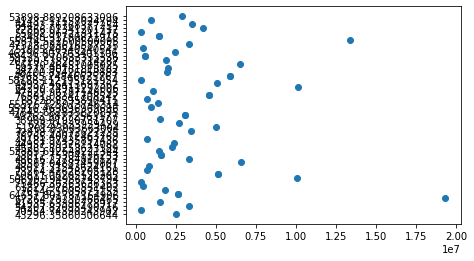

In [13]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

## Check for NaN values (Not a Number)

Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

In [14]:
us_census.female_population.head(15)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
Name: female_population, dtype: float64

In [15]:
fem_pop_nan = us_census.female_population.isnull()
fem_pop_nan.head(15)

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
Name: female_population, dtype: bool

In [16]:
fem_pop_nan.value_counts()

False    57
True      3
Name: female_population, dtype: int64

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

## Work out the best way to fill the NaN values

In [17]:
example_nan = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan.iloc[12]

TotalPop             10006693.0
male_population       4883331.0
female_population     5123362.0
Name: 0, dtype: float64

In [18]:
nan_value = us_census.TotalPop - us_census.male_population


## Double check we got the expected result

In [19]:
us_census.female_population = us_census.female_population.fillna(value=nan_value)
example_nan_fixed = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan_fixed.iloc[12]

TotalPop             10006693.0
male_population       4883331.0
female_population     5123362.0
Name: 0, dtype: float64

In [20]:
us_census.female_population.head(15)

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
Name: female_population, dtype: float64

We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

## Check for duplicates

In [21]:
duplicates = us_census.duplicated()
duplicates.value_counts()

False    51
True      9
dtype: int64

## Drop Dulicate entries

Drop those duplicates using the .drop_duplicates() function.

In [22]:
us_census = us_census.drop_duplicates()
duplicates_check = us_census.duplicated()
duplicates_check.value_counts()

False    51
dtype: int64

Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

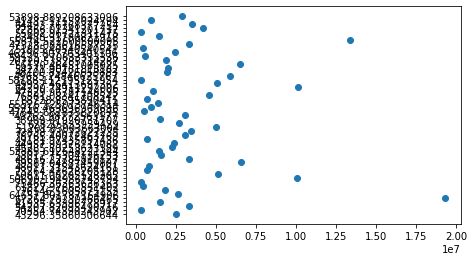

In [23]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [24]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'male_population', 'female_population'],
      dtype='object')

Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [25]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135,19334329.0


## Remove % sign and change data types

In [26]:
us_census.Hispanic = us_census.Hispanic.replace('[\%]', '', regex=True)
us_census.White = us_census.White.replace('[\%]', '', regex=True)
us_census.Black = us_census.Black.replace('[\%]', '', regex=True)
us_census.Native = us_census.Native.replace('[\%]', '', regex=True)
us_census.Asian = us_census.Asian.replace('[\%]', '', regex=True)
us_census.Pacific = us_census.Pacific.replace('[\%]', '', regex=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093,2489527.0
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160,349215.0
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913,1506295.0
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135,19334329.0


In [27]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic             float64
White                float64
Black                float64
Native               float64
Asian                float64
Pacific              float64
Income                object
male_population        int64
female_population    float64
dtype: object

## Check for NaN values

In [28]:
Hnan = us_census.Hispanic.isnull()
Wnan = us_census.White.isnull()
Bnan = us_census.Black.isnull()
Nnan = us_census.Native.isnull()
Anan = us_census.Asian.isnull()
Pnan = us_census.Pacific.isnull()
    

In [29]:
Hnan.value_counts()

False    51
Name: Hispanic, dtype: int64

In [30]:
Wnan.value_counts()

False    51
Name: White, dtype: int64

In [31]:
Bnan.value_counts()

False    51
Name: Black, dtype: int64

In [32]:
Nnan.value_counts()

False    51
Name: Native, dtype: int64

In [33]:
Anan.value_counts()

False    51
Name: Asian, dtype: int64

In [34]:
Pnan.value_counts() # has 4 nan values we need to get rid of

False    47
True      4
Name: Pacific, dtype: int64

## Work out the best way to replace the NaN values

We should be able to find the missing percentage as we have the others and they should all add up to 100%

In [35]:
# nan_value = 100 -(us_census.Hispanic + us_census.White + us_census.Black + us_census.Native + us_census.Asian)
# us_census.Pacific = us_census.Pacific.fillna(value=nan_value)
# us_census.Pacific

# After having checked, the mean value of the column seems more realistic.

```0    0.035833
1    0.046978
2    0.041892
3    0.043156
4    0.068816
5    0.825983
1    0.030601
2    0.064715
3    0.609896
4    0.026446
5    0.020833
0    0.036285
1    0.019809
2    0.019549
3    0.032909
4    0.015046
5    0.101657
1    0.072222
2    0.057143
3    0.574521
4    0.016096
5    0.031319
0    0.022645
1    0.106220
2    0.345333
3    0.019394
4    0.001240
1    0.042771
2    0.023451
3    0.052326
4    1.821463
0    0.046602
1    8.758861
2    0.127181
3    0.020032
4    0.032625
5    0.055164
1    2.764474
2    0.046438
3    0.039184
4    0.015670
0    2.537842
1    0.018599
2    2.270093
3    0.029609
4    0.051510
Name: Pacific, dtype: float64```

In [36]:
nan_value = us_census.Pacific.mean()
us_census.Pacific = us_census.Pacific.fillna(value=nan_value)

In [37]:
us_census.Pacific

0    0.034354
1    1.058683
2    0.167632
3    0.146861
4    0.351410
5    0.306500
1    0.018599
2    0.306500
3    0.029609
4    0.051510
5    0.046602
1    8.758861
2    0.127181
3    0.020032
4    0.032625
5    0.055164
1    0.306500
2    0.046438
3    0.039184
4    0.015670
5    0.036285
1    0.019809
2    0.019549
3    0.032909
4    0.015046
5    0.101657
1    0.072222
2    0.057143
3    0.574521
4    0.016096
5    0.031319
1    0.042771
2    0.023451
3    0.052326
4    0.306500
5    0.022645
1    0.106220
2    0.345333
3    0.019394
4    0.001240
5    0.035833
1    0.046978
2    0.041892
3    0.043156
4    0.068816
5    0.825983
1    0.030601
2    0.064715
3    0.609896
4    0.026446
5    0.020833
Name: Pacific, dtype: float64

In [38]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.35860306644,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.74390243902,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.82095490716,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.63396778917,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.78230266465,19087135,19334329.0


## Plot Histograms 

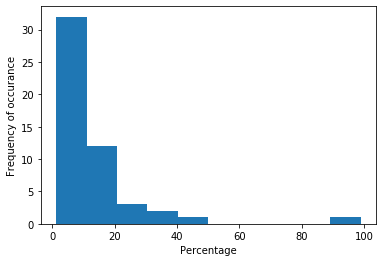

In [39]:
pyplot.hist(us_census.Hispanic)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

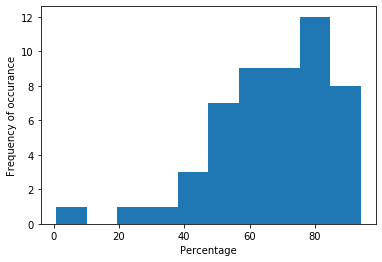

In [40]:
pyplot.hist(us_census.White)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

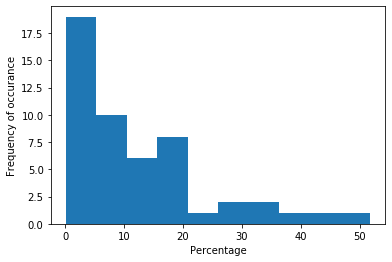

In [41]:
pyplot.hist(us_census.Black)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

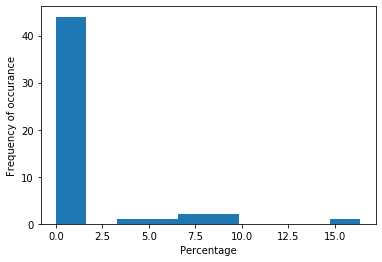

In [42]:
pyplot.hist(us_census.Native)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

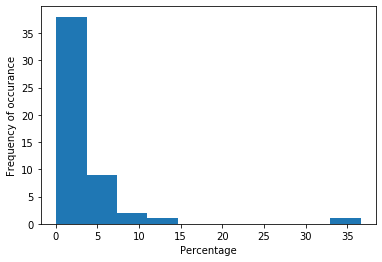

In [43]:
pyplot.hist(us_census.Asian)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

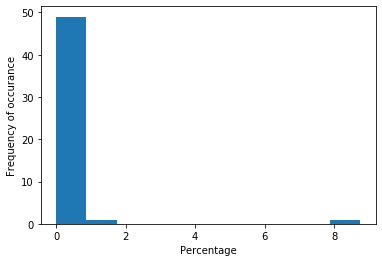

In [44]:
pyplot.hist(us_census.Pacific)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

# 2.Power Inventory

In [45]:
# Data for all of the locations of Petal Power is in the file inventory.csv. 
# Load the data into a DataFrame called inventory.

In [46]:
inventory = pd.read_csv('inventory.csv')
print(inventory.head(10))

        location  product_type         product_description  quantity  price
0  Staten Island         seeds                       daisy         4   6.99
1  Staten Island         seeds                  calla lily        46  19.99
2  Staten Island         seeds                      tomato        85  13.99
3  Staten Island  garden tools                        rake         4  13.99
4  Staten Island  garden tools                 wheelbarrow         0  89.99
5  Staten Island  garden tools                       spade        93  19.99
6  Staten Island  pest_control               insect killer        74  12.99
7  Staten Island  pest_control                 weed killer         8  23.99
8  Staten Island       planter  20 inch terracotta planter         0  17.99
9  Staten Island       planter      8 inch plastic planter        53   3.99


In [47]:
# The first 10 rows represent data from your Staten Island location.
# Select these rows and save them to staten_island.

In [48]:
staten_island = inventory.head(10)
print(staten_island)

        location  product_type         product_description  quantity  price
0  Staten Island         seeds                       daisy         4   6.99
1  Staten Island         seeds                  calla lily        46  19.99
2  Staten Island         seeds                      tomato        85  13.99
3  Staten Island  garden tools                        rake         4  13.99
4  Staten Island  garden tools                 wheelbarrow         0  89.99
5  Staten Island  garden tools                       spade        93  19.99
6  Staten Island  pest_control               insect killer        74  12.99
7  Staten Island  pest_control                 weed killer         8  23.99
8  Staten Island       planter  20 inch terracotta planter         0  17.99
9  Staten Island       planter      8 inch plastic planter        53   3.99


In [49]:
# A customer just emailed you asking what products are sold at your Staten Island location. 
# Select the column product_description from staten_island and save it to the variable product_request.

In [50]:
product_request = staten_island.product_description

In [51]:
# Another customer emails to ask what types of seeds are sold at the Brooklyn location. 
# Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request.

In [52]:
seed_request = inventory[(inventory.location == "Brooklyn") & (inventory.product_type == "seeds")]
print(seed_request)

    location product_type product_description  quantity  price
10  Brooklyn        seeds               daisy        50   6.99
11  Brooklyn        seeds          calla lily         0  19.99
12  Brooklyn        seeds              tomato         0  13.99


In [53]:
# Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [54]:
inventory['in_stock'] = inventory.apply(lambda row: True 
if row.quantity > 0 else False, axis =1)
print(inventory)

         location  product_type         product_description  quantity  price  \
0   Staten Island         seeds                       daisy         4   6.99   
1   Staten Island         seeds                  calla lily        46  19.99   
2   Staten Island         seeds                      tomato        85  13.99   
3   Staten Island  garden tools                        rake         4  13.99   
4   Staten Island  garden tools                 wheelbarrow         0  89.99   
5   Staten Island  garden tools                       spade        93  19.99   
6   Staten Island  pest_control               insect killer        74  12.99   
7   Staten Island  pest_control                 weed killer         8  23.99   
8   Staten Island       planter  20 inch terracotta planter         0  17.99   
9   Staten Island       planter      8 inch plastic planter        53   3.99   
10       Brooklyn         seeds                       daisy        50   6.99   
11       Brooklyn         seeds         

In [55]:
# Petal Power wants to know how valuable their current inventory is.
# Create a column called total_value that is equal to price multiplied by quantity.

In [56]:
inventory['total_value'] = inventory.apply(lambda row: row.price * row.quantity, axis =1)
print(inventory)

         location  product_type         product_description  quantity  price  \
0   Staten Island         seeds                       daisy         4   6.99   
1   Staten Island         seeds                  calla lily        46  19.99   
2   Staten Island         seeds                      tomato        85  13.99   
3   Staten Island  garden tools                        rake         4  13.99   
4   Staten Island  garden tools                 wheelbarrow         0  89.99   
5   Staten Island  garden tools                       spade        93  19.99   
6   Staten Island  pest_control               insect killer        74  12.99   
7   Staten Island  pest_control                 weed killer         8  23.99   
8   Staten Island       planter  20 inch terracotta planter         0  17.99   
9   Staten Island       planter      8 inch plastic planter        53   3.99   
10       Brooklyn         seeds                       daisy        50   6.99   
11       Brooklyn         seeds         

In [57]:
# Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [59]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)
inventory['full_description'] = inventory.apply(combine_lambda, axis =1)

inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
